# DAM Project -Calling OpenAI to resolve Homework-2 questions

In [1]:
!pip install openai


In [4]:

import openai
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os
import openai
from IPython.display import display

In [6]:

#loading environment variable
load_dotenv()

secret_key_path = r"Please provide your key path here"
with open(secret_key_path, 'r') as file: #opening key file
    api_key = file.read().strip()

# Setting the OpenAI API key

openai.api_key = api_key


### Task in Homework-2


##### Task 1: Creating the Dataset Objective
Your mission is to extract valuable data from the rainbow.jpg image. We will transform each pixel into a row of data containing its (x, y) coordinates and RGB color values, creating a comprehensive dataset ready for analysis and visualization.

Steps to Follow
Load the Image: Use the PIL (Pillow) library to open and read the image file.

Hint: Make sure to handle images with an alpha channel (RGBA) by converting them to RGB to simplify your data.
Convert to a NumPy Array: Transform the image into a NumPy array for easy access to pixel data.

Extract Coordinates and RGB Values:

Create arrays for x and y coordinates using NumPy functions like np.arange() and np.tile().
Reshape the image array to extract the RGB values for each pixel in a format that’s easy to work with.
Hint: The reshape(-1, 3) method helps flatten the array while keeping the RGB structure intact.
Create a Pandas DataFrame:

Combine the (x, y) coordinates and RGB values into a structured DataFrame.
Inspect the DataFrame:

Print out the first ten rows of the DataFrame to ensure that the data extraction was successful.


##### Task 2: Visualizing and Cleaning the Image Data
Objective
Now that we have created a dataset from the rainbow1.jpg image, it's time to visualize the image and address any noise it may contain. Our goal is to print the image, identify noise, and use the dataset to remove or reduce that noise for a cleaner representation.

Steps to Follow
Visualize the Original Image:
Use matplotlib to display the image from the dataset and observe any visible noise or artifacts.
Analyze Noise:
Look for patterns or outliers in the pixel data that indicate noise (e.g., isolated dark spots or random bright pixels).
Filter the Dataset:
Use conditions to filter out unwanted noise based on RGB values or other criteria.
Reconstruct and Display the Cleaned Image:
Reconstruct the image using the filtered DataFrame and visualize it to confirm that the noise has been reduced.

##### Task 3: KMeans Clustering with scikit-learn
Objective
In this task, you'll apply clustering techniques to the image dataset to identify and group pixels with similar properties. The main goal is to learn how clustering can reveal patterns in data and segment the image into distinct regions based on color and position.

Steps to Follow
Standardize the Data:

Choose an appropriate scaler from scikit-learn to standardize the pixel data, ensuring all features contribute equally to the clustering process. You may use any scaler that suits your needs (e.g., StandardScaler, MinMaxScaler).
Hint: Experimenting with different scalers can help you understand their impact on clustering results.
Perform KMeans Clustering:

Utilize KMeans from scikit-learn to cluster the dataset into groups. Select the number of clusters based on your analysis or experimentation.
Note: Clustering helps in understanding how data points (pixels) relate based on their features (x, y, R, G, B).
Add Cluster Labels to the DataFrame:

Assign the cluster labels to each pixel and append them to the DataFrame for further analysis and visualization.
Visualize the Clustered Data:

Use any plotting library of your choice to create a visualization that shows how the image is segmented into clusters.
Tip: Customize your plots to highlight the clusters effectively (e.g., color coding based on cluster labels).
    
    
##### Task 4: Custom Clustering Algorithm with PyTorch
Objective
In this task, you'll take a step beyond pre-built libraries and implement your own clustering algorithm using PyTorch. This exercise will help you understand the mechanics of clustering and give you a deeper appreciation for how these algorithms work under the hood.

Steps to Follow
Prepare the Data:

Ensure that the data is in a format suitable for PyTorch (i.e., convert the relevant DataFrame columns to PyTorch tensors).
Scale the features as needed. You can apply any scaling or normalization strategy you find useful.
Initialize Centroids:

Randomly select initial centroids from the dataset. The number of clusters should be chosen based on your analysis (e.g., 8 clusters).
Implement the Clustering Algorithm:

Create a loop for a set number of iterations:
Calculate Distances: Compute the distance from each data point to each centroid.
Assign Labels: Assign each data point to the nearest centroid.
Update Centroids: Recompute each centroid as the mean of all points assigned to it.
Hint: Use torch.cdist() for distance calculation and torch.mean() for centroid updates.
Add Cluster Labels to the DataFrame:

Convert the computed cluster labels from PyTorch tensors back to a format that can be added to the DataFrame for visualization.
Visualize the Clusters:

Plot the clustered image data to show how the pixels are grouped. Use any visualization library you prefer.

In [7]:
print("Please ask any questions about image clustering (type 'exit' to quit):")


#creating function for prompt

def gpt_prompt():
    print("Ask me anything about image clustering (type 'exit' when you want to leave)")
    
    
while True:  # infinite loop until user quits
        # getting user input 
        
        homework_question = input("\nWhat's your question? ")
        
        # check if user wants to exist the task
       
        if homework_question.lower() in ['exit', 'quit', 'bye']:  # for closing prompt
            print("Ok, closing now...")
            break
        
        
        try:
            
            output = openai.chat.completions.create(
                model="gpt-3.5-turbo",  # using model 3.5-turbo to save credits
           messages=[
                    {
                        "role": "system", 
                        "content": "You're a python expert. When user ask you by giving you a task of image clustering. write code nicely. Include explanation for each line of code at the end of execution"
                    },
                    {
                        "role": "user", 
                        "content": homework_question
                    }
                ]
            )

       #  the output for the question
            answer = output.choices[0].message.content.strip()
            
            
            #  formatting text size
            print("\n" + "=" * 20 + " Answer " + "=" * 20 + "\n")
            print(answer)
            
        except Exception as e:
            # probably should handle different types of errors separately
            print(f"\nUgh, something broke: {str(e)}")
            print("Maybe try again?")

if __name__ == "gpt_prompt":
    gpt_prompt()  
        
        

        
        
        
        
        

Please ask any questions about image clustering (type 'exit' to quit):



What's your question?  Create arrays for x and y coordinates using NumPy functions like np.arange() and np.tile(). Reshape the image array to extract the RGB values for each pixel in a format that’s easy to work with. Hint: The reshape(-1, 3) method helps flatten the array while keeping the RGB structure intact. Create a Pandas DataFrame:  Combine the (x, y) coordinates and RGB values into a structured DataFrame. Inspect the DataFrame:  Print out the first ten rows of the DataFrame to ensure that the data extraction was successful.



==================== Answer ====================

```python
import numpy as np
import pandas as pd
from PIL import Image

# Load the image
image = Image.open("image.jpg")
pixels = np.array(image)

# Create arrays for x and y coordinates
height, width, _ = pixels.shape
x_coords = np.arange(width)
y_coords = np.arange(height)
x_coords = np.tile(x_coords, height)
y_coords = np.repeat(y_coords, width)

# Reshape the image array to extract RGB values for each pixel
pixels_flat = pixels.reshape(-1, 3)

# Create a Pandas DataFrame
data = pd.DataFrame({
    'x': x_coords,
    'y': y_coords,
    'R': pixels_flat[:, 0],
    'G': pixels_flat[:, 1],
    'B': pixels_flat[:, 2]
})

# Inspect the DataFrame
print(data.head(10))
```

Explanation:
1. Import necessary libraries: `numpy` for numerical operations, `pandas` for creating DataFrames, and `Image` from `PIL` for working with images.
   
2. Load the image using `Image.open` and convert it to a NumPy array using `np.array`.

3. Get the dimension


What's your question?  Create arrays for x and y coordinates using NumPy functions like np.arange() and np.tile(). Reshape the image array to extract the RGB values for each pixel in a format that’s easy to work with. Hint: The reshape(-1, 3) method helps flatten the array while keeping the RGB structure intact. Create a Pandas DataFrame:  Combine the (x, y) coordinates and RGB values into a structured DataFrame. Inspect the DataFrame:  Print out the first ten rows of the DataFrame to ensure that the data extraction was successful.



==================== Answer ====================

```python
import numpy as np
import pandas as pd

# Generate x and y coordinates using np.arange()
x = np.arange(image.shape[1])
y = np.arange(image.shape[0])

# Use np.tile() to repeat x and y to match the dimensions of the image
x_coords = np.tile(x, len(y))
y_coords = np.repeat(y, len(x))

# Reshape the image array to extract RGB values for each pixel
rgb_values = image.reshape(-1, 3)

# Create a Pandas DataFrame to combine coordinates and RGB values
df = pd.DataFrame({'x': x_coords, 'y': y_coords, 'R': rgb_values[:, 0], 'G': rgb_values[:, 1], 'B': rgb_values[:, 2]})

# Print the first ten rows of the DataFrame
print(df.head(10))
```

Explanation:
1. `import numpy as np` and `import pandas as pd`: Import necessary libraries for array operations and DataFrame creation.
2. Generate x and y coordinates using `np.arange()`: Create arrays representing the x and y coordinates of the image.
3. Use `np.tile()` to repeat x coordinates and `n


What's your question?  n



==================== Answer ====================

Sure, I can help you with image clustering. Here is a sample Python code using KMeans algorithm from scikit-learn library to cluster images:

```python
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Reshape the image data to a 2D array of pixels
img_flattened = img.reshape((-1, 3))

# Define the number of clusters
num_clusters = 5

# Fit KMeans clustering algorithm to the image data
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(img_flattened)
labels = kmeans.labels_

# Assign each pixel to one of the clusters
clustered_img = np.zeros_like(img_flattened)
for i in range(num_clusters):
    clustered_img[labels == i] = kmeans.cluster_centers_[i]

# Reshape the clustered image data back to the original shape
clustered_img = clustered_img.reshape(img.shape)

# Display the original image and the


What's your question?  quit


Ok, closing now...


### Result sample from Open-AI

   x  y   R   G   B
0  0  0  71  66  47
1  1  0  41  44  27
2  2  0  35  48  31
3  3  0  23  41  27
4  4  0  42  53  45
5  5  0  21  16  13
6  6  0  30   5   8
7  7  0  79  40  43
8  8  0  64  24  22
9  9  0  56  29  18


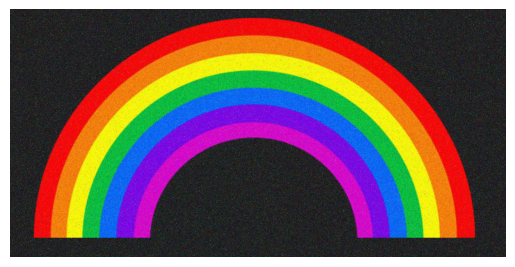

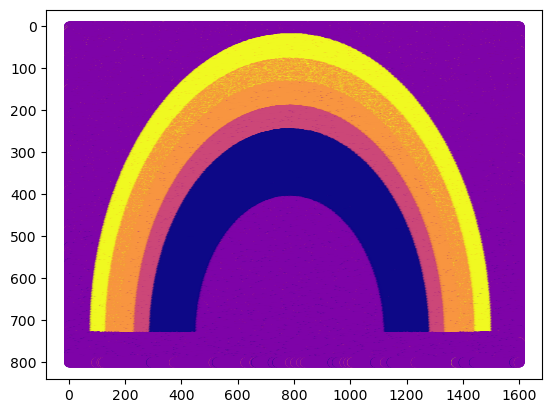

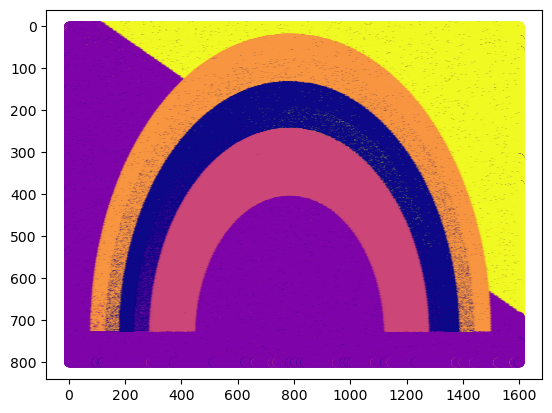

In [9]:
###This is the result sample from chatgpt 
#### This is AI made code 
### Result from open-AI is very simple and short

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
import torch

# Task 1
# Load the Image
image = Image.open('rainbow.jpg').convert('RGB')

# Convert to a NumPy Array
image_array = np.array(image)

# Extract Coordinates and RGB Values
x, y = np.meshgrid(np.arange(image_array.shape[1]), np.arange(image_array.shape[0]))
coordinates = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))
colors = image_array.reshape(-1, 3)

# Create a Pandas DataFrame
data = pd.DataFrame(np.hstack((coordinates, colors)), columns=['x', 'y', 'R', 'G', 'B'])

# Inspect the DataFrame
print(data.head(10))

# Task 2
# Visualize the Original Image
plt.imshow(image_array)
plt.axis('off')
plt.show()

# Task 3
# Standardize the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=0)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the Clustered Data
plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='plasma')
plt.gca().invert_yaxis()  # invert y axis to match image coordinates
plt.show()

# Task 4
# Prepare the Data
features = scaled_data[:, :5]
features = torch.from_numpy(features).float()

# Initialize Centroids
initial_centroids_idx = np.random.choice(len(features), size=5, replace=False)
centroids = features[initial_centroids_idx]

# Implement the Clustering Algorithm
num_iterations = 10
for _ in range(num_iterations):
    distances = torch.cdist(features, centroids)
    cluster_assignments = torch.argmin(distances, dim=1)
    for i in range(5):
        centroids[i] = features[cluster_assignments == i].mean(dim=0)

data['custom_cluster'] = cluster_assignments.numpy()

# Visualize the Custom Clusters
plt.scatter(data['x'], data['y'], c=data['custom_cluster'], cmap='plasma')
plt.gca().invert_yaxis()
plt.show()
